# Test of the Holdout Testing Set
#### Imports and Read in the model and data

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
rdst = 815

In [337]:
rf = pickle.load(open('finalized_rf.sav', 'rb'))
ss = pickle.load(open('finalized_ss.sav', 'rb'))

In [311]:
train = pd.read_csv('../data/clean_pets.csv') # Need to match features for modeling
holdout = pd.read_csv('../data/holdout.csv')


In [312]:
holdout.shape

(3749, 24)

In [313]:
holdout.columns = map(str.lower, holdout.columns) 
holdout.fillna(0, inplace = True)                      # Fill NA
holdout.drop(holdout[holdout['quantity'] > 3].index, inplace = True)             # Only three or fewer
# holdout.drop(columns = ['name', 'adoptionspeed', 'description', 'petid', 'rescuerid', 'state'], inplace = True)


In [314]:
holdout.shape

(3464, 24)

In [315]:
train.shape

(10249, 315)

In [316]:
breeds = {1 : 'Affenpinscher',
2 : 'Afghan Hound',
3 : 'Airedale Terrier',
4 : 'Akbash',
5 : 'Akita',
6 : 'Alaskan Malamute',
7 : 'American Bulldog',
8 : 'American Eskimo Dog',
9 : 'American Hairless Terrier',
10 : 'American Staffordshire Terrier',
11 : 'American Water Spaniel',
12 : 'Anatolian Shepherd',
13 : 'Appenzell Mountain Dog',
14 : 'Australian Cattle Dog/Blue Heeler',
15 : 'Australian Kelpie',
16 : 'Australian Shepherd',
17 : 'Australian Terrier',
18 : 'Basenji',
19 : 'Basset Hound',
20 : 'Beagle',
21 : 'Bearded Collie',
22 : 'Beauceron',
23 : 'Bedlington Terrier',
24 : 'Belgian Shepherd Dog Sheepdog',
25 : 'Belgian Shepherd Laekenois',
26 : 'Belgian Shepherd Malinois',
27 : 'Belgian Shepherd Tervuren',
28 : 'Bernese Mountain Dog',
29 : 'Bichon Frise',
30 : 'Black and Tan Coonhound',
31 : 'Black Labrador Retriever',
32 : 'Black Mouth Cur',
33 : 'Black Russian Terrier',
34 : 'Bloodhound',
35 : 'Blue Lacy',
36 : 'Bluetick Coonhound',
37 : 'Boerboel',
38 : 'Bolognese',
39 : 'Border Collie',
40 : 'Border Terrier',
41 : 'Borzoi',
42 : 'Boston Terrier',
43 : 'Bouvier des Flanders',
44 : 'Boxer',
45 : 'Boykin Spaniel',
46 : 'Briard',
47 : 'Brittany Spaniel',
48 : 'Brussels Griffon',
49 : 'Bull Terrier',
50 : 'Bullmastiff',
51 : 'Cairn Terrier',
52 : 'Canaan Dog',
53 : 'Cane Corso Mastiff',
54 : 'Carolina Dog',
55 : 'Catahoula Leopard Dog',
56 : 'Cattle Dog',
57 : 'Caucasian Sheepdog (Caucasian Ovtcharka)',
58 : 'Cavalier King Charles Spaniel',
59 : 'Chesapeake Bay Retriever',
60 : 'Chihuahua',
61 : 'Chinese Crested Dog',
62 : 'Chinese Foo Dog',
63 : 'Chinook',
64 : 'Chocolate Labrador Retriever',
65 : 'Chow Chow',
66 : 'Cirneco dellEtna',
67 : 'Clumber Spaniel',
68 : 'Cockapoo',
69 : 'Cocker Spaniel',
70 : 'Collie',
71 : 'Coonhound',
72 : 'Corgi',
73 : 'Coton de Tulear',
74 : 'Curly-Coated Retriever',
75 : 'Dachshund',
76 : 'Dalmatian',
77 : 'Dandi Dinmont Terrier',
78 : 'Doberman Pinscher',
79 : 'Dogo Argentino',
80 : 'Dogue de Bordeaux',
81 : 'Dutch Shepherd',
82 : 'English Bulldog',
83 : 'English Cocker Spaniel',
84 : 'English Coonhound',
85 : 'English Pointer',
86 : 'English Setter',
87 : 'English Shepherd',
88 : 'English Springer Spaniel',
89 : 'English Toy Spaniel',
90 : 'Entlebucher',
91 : 'Eskimo Dog',
92 : 'Feist',
93 : 'Field Spaniel',
94 : 'Fila Brasileiro',
95 : 'Finnish Lapphund',
96 : 'Finnish Spitz',
97 : 'Flat-coated Retriever',
98 : 'Fox Terrier',
99 : 'Foxhound',
100 : 'French Bulldog',
101 : 'Galgo Spanish Greyhound',
102 : 'German Pinscher',
103 : 'German Shepherd Dog',
104 : 'German Shorthaired Pointer',
105 : 'German Spitz',
106 : 'German Wirehaired Pointer',
107 : 'Giant Schnauzer',
108 : 'Glen of Imaal Terrier',
109 : 'Golden Retriever',
110 : 'Gordon Setter',
111 : 'Great Dane',
112 : 'Great Pyrenees',
113 : 'Greater Swiss Mountain Dog',
114 : 'Greyhound',
115 : 'Harrier',
116 : 'Havanese',
117 : 'Hound',
118 : 'Hovawart',
119 : 'Husky',
120 : 'Ibizan Hound',
121 : 'Illyrian Sheepdog',
122 : 'Irish Setter',
123 : 'Irish Terrier',
124 : 'Irish Water Spaniel',
125 : 'Irish Wolfhound',
126 : 'Italian Greyhound',
127 : 'Italian Spinone',
128 : 'Jack Russell Terrier',
129 : 'Jack Russell Terrier (Parson Russell Terrier)',
130 : 'Japanese Chin',
131 : 'Jindo',
132 : 'Kai Dog',
133 : 'Karelian Bear Dog',
134 : 'Keeshond',
135 : 'Kerry Blue Terrier',
136 : 'Kishu',
137 : 'Klee Kai',
138 : 'Komondor',
139 : 'Kuvasz',
140 : 'Kyi Leo',
141 : 'Labrador Retriever',
142 : 'Lakeland Terrier',
143 : 'Lancashire Heeler',
144 : 'Leonberger',
145 : 'Lhasa Apso',
146 : 'Lowchen',
147 : 'Maltese',
148 : 'Manchester Terrier',
149 : 'Maremma Sheepdog',
150 : 'Mastiff',
151 : 'McNab',
152 : 'Miniature Pinscher',
153 : 'Mountain Cur',
154 : 'Mountain Dog',
155 : 'Munsterlander',
156 : 'Neapolitan Mastiff',
157 : 'New Guinea Singing Dog',
158 : 'Newfoundland Dog',
159 : 'Norfolk Terrier',
160 : 'Norwegian Buhund',
161 : 'Norwegian Elkhound',
162 : 'Norwegian Lundehund',
163 : 'Norwich Terrier',
164 : 'Nova Scotia Duck-Tolling Retriever',
165 : 'Old English Sheepdog',
166 : 'Otterhound',
167 : 'Papillon',
168 : 'Patterdale Terrier (Fell Terrier)',
169 : 'Pekingese',
170 : 'Peruvian Inca Orchid',
171 : 'Petit Basset Griffon Vendeen',
172 : 'Pharaoh Hound',
173 : 'Pit Bull Terrier',
174 : 'Plott Hound',
175 : 'Podengo Portugueso',
176 : 'Pointer',
177 : 'Polish Lowland Sheepdog',
178 : 'Pomeranian',
179 : 'Poodle',
180 : 'Portuguese Water Dog',
181 : 'Presa Canario',
182 : 'Pug',
183 : 'Puli',
184 : 'Pumi',
185 : 'Rat Terrier',
186 : 'Redbone Coonhound',
187 : 'Retriever',
188 : 'Rhodesian Ridgeback',
189 : 'Rottweiler',
190 : 'Saint Bernard',
191 : 'Saluki',
192 : 'Samoyed',
193 : 'Sarplaninac',
194 : 'Schipperke',
195 : 'Schnauzer',
196 : 'Scottish Deerhound',
197 : 'Scottish Terrier Scottie',
198 : 'Sealyham Terrier',
199 : 'Setter',
200 : 'Shar Pei',
201 : 'Sheep Dog',
202 : 'Shepherd',
203 : 'Shetland Sheepdog Sheltie',
204 : 'Shiba Inu',
205 : 'Shih Tzu',
206 : 'Siberian Husky',
207 : 'Silky Terrier',
208 : 'Skye Terrier',
209 : 'Sloughi',
210 : 'Smooth Fox Terrier',
211 : 'South Russian Ovtcharka',
212 : 'Spaniel',
213 : 'Spitz',
214 : 'Staffordshire Bull Terrier',
215 : 'Standard Poodle',
216 : 'Sussex Spaniel',
217 : 'Swedish Vallhund',
218 : 'Terrier',
219 : 'Thai Ridgeback',
220 : 'Tibetan Mastiff',
221 : 'Tibetan Spaniel',
222 : 'Tibetan Terrier',
223 : 'Tosa Inu',
224 : 'Toy Fox Terrier',
225 : 'Treeing Walker Coonhound',
226 : 'Vizsla',
227 : 'Weimaraner',
228 : 'Welsh Corgi',
229 : 'Welsh Springer Spaniel',
230 : 'Welsh Terrier',
231 : 'West Highland White Terrier Westie',
232 : 'Wheaten Terrier',
233 : 'Whippet',
234 : 'White German Shepherd',
235 : 'Wire Fox Terrier',
236 : 'Wire-haired Pointing Griffon',
237 : 'Wirehaired Terrier',
238 : 'Xoloitzcuintle/Mexican Hairless',
239 : 'Yellow Labrador Retriever',
240 : 'Yorkshire Terrier Yorkie',
307 : 'Mixed Breed',
241 : 'Abyssinian',
242 : 'American Curl',
243 : 'American Shorthair',
244 : 'American Wirehair',
245 : 'Applehead Siamese',
246 : 'Balinese',
247 : 'Bengal',
248 : 'Birman',
249 : 'Bobtail',
250 : 'Bombay',
251 : 'British Shorthair',
252 : 'Burmese',
253 : 'Burmilla',
254 : 'Calico',
255 : 'Canadian Hairless',
256 : 'Chartreux',
257 : 'Chausie',
258 : 'Chinchilla',
259 : 'Cornish Rex',
260 : 'Cymric',
261 : 'Devon Rex',
262 : 'Dilute Calico',
263 : 'Dilute Tortoiseshell',
264 : 'Domestic Long Hair',
265 : 'Domestic Medium Hair',
266 : 'Domestic Short Hair',
267 : 'Egyptian Mau',
268 : 'Exotic Shorthair',
269 : 'Extra-Toes Cat (Hemingway Polydactyl)',
270 : 'Havana',
271 : 'Himalayan',
272 : 'Japanese Bobtail',
273 : 'Javanese',
274 : 'Korat',
275 : 'LaPerm',
276 : 'Maine Coon',
277 : 'Manx',
278 : 'Munchkin',
279 : 'Nebelung',
280 : 'Norwegian Forest Cat',
281 : 'Ocicat',
282 : 'Oriental Long Hair',
283 : 'Oriental Short Hair',
284 : 'Oriental Tabby',
285 : 'Persian',
286 : 'Pixie-Bob',
287 : 'Ragamuffin',
288 : 'Ragdoll',
289 : 'Russian Blue',
290 : 'Scottish Fold',
291 : 'Selkirk Rex',
292 : 'Siamese',
293 : 'Siberian',
294 : 'Silver',
295 : 'Singapura',
296 : 'Snowshoe',
297 : 'Somali',
298 : 'Sphynx (hairless cat)',
299 : 'Tabby',
300 : 'Tiger',
301 : 'Tonkinese',
302 : 'Torbie',
303 : 'Tortoiseshell',
304 : 'Turkish Angora',
305 : 'Turkish Van',
306 : 'Tuxedo'
}

In [317]:
holdout['breed1'] = holdout['breed1'].replace(breeds)

holdout['breed2'] = holdout['breed2'].replace(breeds)

In [318]:
ohef = ['breed1','breed2','color1', 'color2', 'color3','type', 'gender']
holdout = pd.get_dummies(holdout, columns = ohef, drop_first = True)


In [319]:
holdout = holdout.drop(columns = ['name', 'description', 'petid', 'rescuerid', 'state'])

In [267]:
len(feat_diff)

100

In [320]:
feat_diff = set(train.columns) - set(holdout.columns)
feat_diff

{'breed1_Akita',
 'breed1_American Bulldog',
 'breed1_American Water Spaniel',
 'breed1_Australian Shepherd',
 'breed1_Balinese',
 'breed1_Basset Hound',
 'breed1_Bedlington Terrier',
 'breed1_Burmilla',
 'breed1_Cattle Dog',
 'breed1_Cymric',
 'breed1_Dutch Shepherd',
 'breed1_Egyptian Mau',
 'breed1_English Springer Spaniel',
 'breed1_Extra-Toes Cat (Hemingway Polydactyl)',
 'breed1_Flat-coated Retriever',
 'breed1_Fox Terrier',
 'breed1_Foxhound',
 'breed1_German Spitz',
 'breed1_Glen of Imaal Terrier',
 'breed1_Havana',
 'breed1_Irish Terrier',
 'breed1_Irish Wolfhound',
 'breed1_Japanese Chin',
 'breed1_Kai Dog',
 'breed1_Kuvasz',
 'breed1_Lowchen',
 'breed1_Mastiff',
 'breed1_Mountain Dog',
 'breed1_Munsterlander',
 'breed1_Nebelung',
 'breed1_Old English Sheepdog',
 'breed1_Pixie-Bob',
 'breed1_Pointer',
 'breed1_Retriever',
 'breed1_Samoyed',
 'breed1_Scottish Fold',
 'breed1_Somali',
 'breed1_Spaniel',
 'breed1_Sphynx (hairless cat)',
 'breed1_Staffordshire Bull Terrier',
 'br

In [321]:
holdout['breed1_Akita'] = 0
holdout['breed1_American Bulldog'] = 0
holdout['breed1_American Water Spaniel']= 0
holdout['breed1_Australian Shepherd']= 0
holdout['breed1_Balinese']= 0
holdout['breed1_Basset Hound']= 0
holdout['breed1_Bedlington Terrier']= 0
holdout['breed1_Burmilla']= 0
holdout['breed1_Cattle Dog']= 0
holdout['breed1_Cymric']= 0
holdout['breed1_Dutch Shepherd']= 0
holdout['breed1_Egyptian Mau']= 0
holdout['breed1_English Springer Spaniel']= 0
holdout['breed1_Extra-Toes Cat (Hemingway Polydactyl)']= 0
holdout['breed1_Flat-coated Retriever']= 0
holdout['breed1_Fox Terrier']= 0
holdout['breed1_Foxhound']= 0
holdout['breed1_German Spitz']= 0
holdout['breed1_Glen of Imaal Terrier']= 0
holdout['breed1_Havana']= 0
holdout['breed1_Irish Terrier']= 0
holdout['breed1_Irish Wolfhound']= 0
holdout['breed1_Japanese Chin']= 0
holdout['breed1_Kai Dog']= 0
holdout['breed1_Kuvasz']= 0
holdout['breed1_Lowchen']= 0
holdout['breed1_Mastiff']= 0
holdout['breed1_Mountain Dog']= 0
holdout['breed1_Munsterlander']= 0
holdout['breed1_Nebelung']= 0
holdout['breed1_Old English Sheepdog']= 0
holdout['breed1_Pixie-Bob']= 0
holdout['breed1_Pointer']= 0
holdout['breed1_Retriever']= 0
holdout['breed1_Samoyed']= 0
holdout['breed1_Scottish Fold']= 0
holdout['breed1_Somali']= 0
holdout['breed1_Spaniel']= 0
holdout['breed1_Sphynx (hairless cat)']= 0
holdout['breed1_Staffordshire Bull Terrier']= 0
holdout['breed1_Toy Fox Terrier']= 0
holdout['breed1_Turkish Angora']= 0
holdout['breed1_Welsh Corgi']= 0
holdout['breed1_Whippet']= 0
holdout['breed1_White German Shepherd']= 0
holdout['breed2_Afghan Hound']= 0
holdout['breed2_Akbash']= 0
holdout['breed2_Akita']= 0
holdout['breed2_American Curl']= 0
holdout['breed2_American Staffordshire Terrier']= 0
holdout['breed2_Applehead Siamese']= 0
holdout['breed2_Australian Shepherd']= 0
holdout['breed2_Australian Terrier']= 0
holdout['breed2_Basenji']= 0
holdout['breed2_Basset Hound']= 0
holdout['breed2_Bearded Collie']= 0
holdout['breed2_Bluetick Coonhound']= 0
holdout['breed2_Border Terrier']= 0
holdout['breed2_Bull Terrier']= 0
holdout['breed2_Cavalier King Charles Spaniel']= 0
holdout['breed2_Chartreux']= 0
holdout['breed2_Collie']= 0
holdout['breed2_Dalmatian']= 0
holdout['breed2_Dilute Calico']= 0
holdout['breed2_Dilute Tortoiseshell']= 0
holdout['breed2_English Cocker Spaniel']= 0
holdout['breed2_German Shorthaired Pointer']= 0
holdout['breed2_Great Dane']= 0
holdout['breed2_Harrier']= 0
holdout['breed2_Havana']= 0
holdout['breed2_Jack Russell Terrier (Parson Russell Terrier)']= 0
holdout['breed2_Japanese Bobtail']= 0
holdout['breed2_Japanese Chin']= 0
holdout['breed2_Korat']= 0
holdout['breed2_Manx']= 0
holdout['breed2_Mastiff']= 0
holdout['breed2_Munsterlander']= 0
holdout['breed2_Norfolk Terrier']= 0
holdout['breed2_Oriental Tabby']= 0
holdout['breed2_Pekingese']= 0
holdout['breed2_Pug']= 0
holdout['breed2_Saint Bernard']= 0
holdout['breed2_Scottish Fold']= 0
holdout['breed2_Selkirk Rex']= 0
holdout['breed2_Sheep Dog']= 0
holdout['breed2_Shepherd']= 0
holdout['breed2_Shetland Sheepdog Sheltie']= 0
holdout['breed2_Shiba Inu']= 0
holdout['breed2_Siberian Husky']= 0
holdout['breed2_Spaniel']= 0
holdout['breed2_Tonkinese']= 0
holdout['breed2_Torbie']= 0
holdout['breed2_Turkish Angora']= 0
holdout['breed2_Wirehaired Terrier']= 0
holdout['breed2_Yorkshire Terrier Yorkie']= 0
holdout.shape

(3464, 336)

,age,maturitysize,furlength,vaccinated,dewormed,sterilized,health,quantity,fee,videoamt,...,color2_6,color2_7,color3_3,color3_4,color3_5,color3_6,color3_7,type_2,gender_2,gender_3
0,2,3,1,1,1,2,1,3,0,1,...,0,1,0,0,0,0,0,0,0,1
1,4,2,1,3,3,3,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,2,2,2,1,2,1,2,60,0,...,0,0,0,0,0,0,1,1,0,1
3,3,2,1,3,3,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,2,2,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2,2,1,2,2,2,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
6,24,2,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,11,3,2,1,1,2,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,24,2,2,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
10,2,2,2,2,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
ex_feat =  set(holdout.columns) -set (train.columns)
ex_feat

{'breed1_Belgian Shepherd Dog Sheepdog',
 'breed1_Belgian Shepherd Laekenois',
 'breed1_Chartreux',
 'breed1_Chausie',
 'breed1_Chinese Crested Dog',
 'breed1_English Pointer',
 'breed1_Field Spaniel',
 'breed1_Lancashire Heeler',
 'breed1_Ragamuffin',
 'breed1_Swedish Vallhund',
 'breed1_Torbie',
 'breed2_Affenpinscher',
 'breed2_Belgian Shepherd Laekenois',
 'breed2_Bullmastiff',
 'breed2_Chow Chow',
 'breed2_Cymric',
 'breed2_Finnish Spitz',
 'breed2_Irish Setter',
 'breed2_Lowchen',
 'breed2_Nebelung',
 'breed2_Papillon',
 'breed2_Pointer',
 'breed2_Russian Blue',
 'breed2_Siberian',
 'breed2_Smooth Fox Terrier',
 'breed2_Yellow Labrador Retriever'}

In [323]:
holdout.drop(columns = ['breed1_Belgian Shepherd Dog Sheepdog',
 'breed1_Belgian Shepherd Laekenois',
 'breed1_Chartreux',
 'breed1_Chausie',
 'breed1_Chinese Crested Dog',
 'breed1_English Pointer',
 'breed1_Field Spaniel',
 'breed1_Lancashire Heeler',
 'breed1_Ragamuffin',
 'breed1_Swedish Vallhund',
 'breed1_Torbie',
 'breed2_Affenpinscher',
 'breed2_Belgian Shepherd Laekenois',
 'breed2_Bullmastiff',
 'breed2_Chow Chow',
 'breed2_Cymric',
 'breed2_Finnish Spitz',
 'breed2_Irish Setter',
 'breed2_Lowchen',
 'breed2_Nebelung',
 'breed2_Papillon',
 'breed2_Pointer',
 'breed2_Russian Blue',
 'breed2_Siberian',
 'breed2_Smooth Fox Terrier',
 'breed2_Yellow Labrador Retriever'], inplace = True )

In [275]:
holdout['adoptionspeed'][:12]

0     3
1     3
2     2
3     2
4     4
5     2
6     4
7     1
8     4
10    1
11    1
12    2
Name: adoptionspeed, dtype: int64

In [293]:

# ohef = ['breed1','breed2','color1', 'color2', 'color3','type', 'gender']
# for f in ohef:
#     pets_dums = pd.get_dummies(train[f], prefix = f )
#     pets = train.join(pets_dums)

#     hold_dums = pd.get_dummies(holdout[f], prefix = f )
#     hold = holdout.join(hold_dums)
#     feat_diff = set(pets) - set(hold)

#     feat_diff_df = pd.DataFrame(data = np.zeros((pets.shape[0], len(feat_diff))),
#                                columns = list(feat_diff))

#     train = train.join(feat_diff_df)




In [338]:
X = holdout.drop(columns = ['adoptionspeed'])
# X= X.astype(int)
y = holdout['adoptionspeed']

In [339]:
Z = ss.transform(X)

In [346]:
print('Scaled Score: ', rf.score(Z, y))
print('UnScaled Score: ', rf.score(X, y))

Scaled Score:  0.2603926096997691
UnScaled Score:  0.2632794457274827


In [347]:
print('Scaled CV Score: ', cross_val_score(rf, Z, y).mean())
print('UnScaled CV Score: ', cross_val_score(rf, X, y).mean())

Scaled CV Score:  0.38654713943731284
UnScaled CV Score:  0.3836578001317886


In [327]:
X.columns

Index(['age', 'maturitysize', 'furlength', 'vaccinated', 'dewormed',
       'sterilized', 'health', 'quantity', 'fee', 'videoamt',
       ...
       'breed2_Shepherd', 'breed2_Shetland Sheepdog Sheltie',
       'breed2_Shiba Inu', 'breed2_Siberian Husky', 'breed2_Spaniel',
       'breed2_Tonkinese', 'breed2_Torbie', 'breed2_Turkish Angora',
       'breed2_Wirehaired Terrier', 'breed2_Yorkshire Terrier Yorkie'],
      dtype='object', length=309)

In [328]:
y.value_counts(normalize = True)

2    0.273095
4    0.265878
3    0.220266
1    0.209296
0    0.031467
Name: adoptionspeed, dtype: float64

In [329]:
preds = rf.predict(X)

''

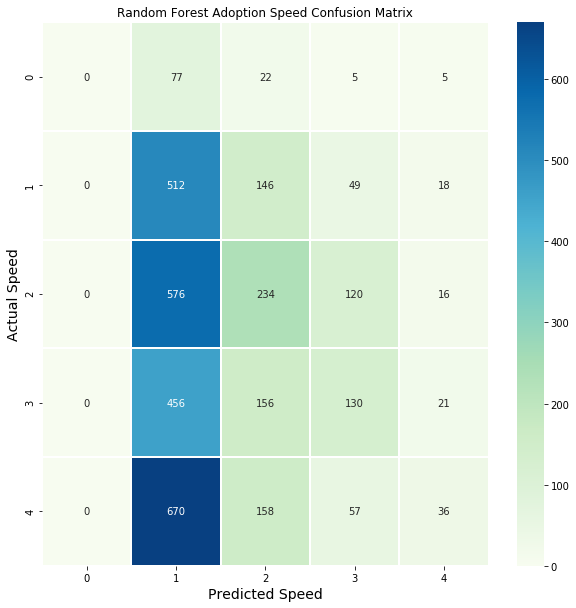

In [332]:
cm = confusion_matrix(y, preds)
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap = 'GnBu', fmt='g', annot = True, linewidth = 1 )
plt.title("Random Forest Adoption Speed Confusion Matrix")
plt.xlabel("Predicted Speed", size = 14)
plt.ylabel("Actual Speed", size = 14)
;

# References